# [Projet 4: Anticipez le retard de vol des avions](https://openclassrooms.com/users/8611834/projects/anticipez-le-retard-de-vol-des-avions)
(parcours data: [here](https://openclassrooms.com/paths/63-data-scientist))

Link to raw data: [here](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Anticipez+le+retard+de+vol+des+avions+-+109/Dataset+Projet+4.zip).  
Source: [here](https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time).  
Variables legend: [here](https://www.transtats.bts.gov/Fields.asp?table_id=236).

In [16]:
import os
HOME = os.path.expanduser('~/')
HOST = os.uname()[1]
if HOST == 'Arthurs-MacBook-Pro.local':
    os.chdir(HOME+'/Documents/GitHub/OCDataSciencePath/Project4/')    # @home
elif HOST == 'Sirius.local':
    os.chdir(HOME+'Perso/GitHub/OCDataSciencePath/Project4/')         # @L2
else:
    raise ValueError('unknown host: {}'.format(HOST))
    
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
if HOST == 'Arthurs-MacBook-Pro.local':
    pathToDataDir = HOME+'xxx'    # @home
elif HOST == 'Sirius.local':
    pathToDataDir = HOME+'Downloads/DatasetProjet4'         # @L2
else:
    raise ValueError('unknown host: {}'.format(HOST))

### Raw data laoding and variable dropping

In [12]:
# variables to keep (based on columns legend and exemples of values)

keepVar = (
    # time period
    'YEAR', 'MONTH', 'DAY_OF_WEEK',
    # airline
    'UNIQUE_CARRIER',
    # origine
    'ORIGIN_AIRPORT_ID', 'ORIGIN', 'ORIGIN_STATE_ABR', 'ORIGIN_WAC',
    # destination
    'DEST_AIRPORT_ID', 'DEST', 'DEST_STATE_ABR', 'DEST_WAC',
    # deprature performance
    'CRS_DEP_TIME', # local time: hhmm
    'DEP_DELAY',    # in minutes -> target variable
#    'DEP_TIME_BLK', # departure Delay intervals, every (15 minutes from <-15 to >180)
    # flight summaries
    'DISTANCE',       # miles
#    'DISTANCE_GROUP', # distance Intervals, every 250 Miles, for Flight Segment
    # cause of delay (may be useless)
#    'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
#    'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'
)

In [13]:
# see if we can concatenate all data

df = pd.DataFrame(columns=keepVar,index=[0])
for csv in os.listdir(pathToDataDir):
    _df = pd.read_csv(os.path.join(pathToDataDir,csv),
                      usecols = keepVar,
                      low_memory=False,
                      error_bad_lines=False)
    df = pd.concat((df,_df),axis=0)

In [14]:
print(df.shape)
df.sample(5)

(5635985, 15)


,YEAR,MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_STATE_ABR,ORIGIN_WAC,DEST_AIRPORT_ID,DEST,DEST_STATE_ABR,DEST_WAC,CRS_DEP_TIME,DEP_DELAY,DISTANCE
68196,2016,11,4,EV,15412,TYS,TN,54,13930,ORD,IL,41,1137,-4,475.0
19190,2016,9,3,AA,13930,ORD,IL,41,12892,LAX,CA,91,1510,56,1744.0
312768,2016,4,3,UA,11292,DEN,CO,82,14771,SFO,CA,91,0600,-8.00,967.0
92848,2016,9,1,B6,12478,JFK,NY,22,10785,BTV,VT,16,2240,-9,266.0
430837,2016,6,4,AA,14100,PHL,PA,23,11057,CLT,NC,36,1140,12,449.0


### Basic cleanup

In [65]:
def plotMissing(df):
    f = plt.figure(figsize=(10,5))
    ax = f.add_subplot(1,1,1)
    ax.barh(y=np.arange(df.shape[1]),
            height=1-(df.count().values/df.shape[0]),
            width=0.5,left=0,
            tick_label=df.columns.values)
    ax.set_xlim((0,1))
    ax.set_title('% of missing values')

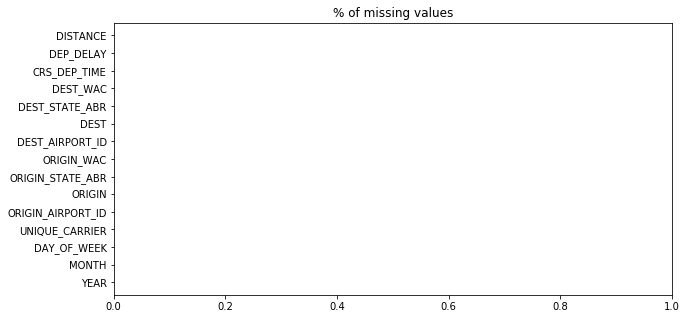

In [66]:
plotMissing(df)

# DRAFT

In [56]:
plt.barh?

In [3]:
n,p = df.shape
print(n,p)
df.sample(5)

5043 28


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1573,Color,Stephen Herek,42.0,143.0,65.0,320.0,Olympia Dukakis,975.0,82528097.0,Drama|Music,...,154.0,English,USA,PG,6500000.0,1995.0,345.0,7.3,2.35,0
1092,Color,Luis Llosa,119.0,89.0,49.0,514.0,Eric Stoltz,2000.0,65557989.0,Action|Adventure|Horror|Thriller,...,271.0,English,USA,PG-13,45000000.0,1997.0,902.0,4.6,2.35,0
2313,Color,Uwe Boll,148.0,94.0,892.0,81.0,Darren Shahlavi,310.0,5132655.0,Horror|Sci-Fi,...,521.0,English,Canada,R,20000000.0,2005.0,294.0,2.3,2.35,1000
4260,Color,Alex Kendrick,34.0,129.0,589.0,341.0,Alex Kendrick,690.0,34522221.0,Drama,...,175.0,English,USA,PG-13,2000000.0,2011.0,589.0,7.0,2.35,10000
2508,Color,Michael Tollin,50.0,108.0,19.0,505.0,Brian Dennehy,973.0,19693891.0,Comedy|Drama|Romance|Sport,...,107.0,English,USA,PG-13,34000000.0,2001.0,954.0,4.9,1.85,476


In [4]:
for col in df.columns.sort_values():
    miss = 100 * (1 - df[col].count()/n)
    print('{:>30}: {}%'.format(col, miss))

        actor_1_facebook_likes: 0.13880626611144642%
                  actor_1_name: 0.13880626611144642%
        actor_2_facebook_likes: 0.25778306563553066%
                  actor_2_name: 0.25778306563553066%
        actor_3_facebook_likes: 0.4560777315090192%
                  actor_3_name: 0.4560777315090192%
                  aspect_ratio: 6.52389450723776%
                        budget: 9.756097560975608%
     cast_total_facebook_likes: 0.0%
                         color: 0.376759865159626%
                content_rating: 6.008328375966688%
                       country: 0.09914733293674427%
       director_facebook_likes: 2.0622645250842786%
                 director_name: 2.0622645250842786%
                      duration: 0.2974419988102328%
          facenumber_in_poster: 0.25778306563553066%
                        genres: 0.0%
                         gross: 17.52924846321634%
                    imdb_score: 0.0%
                      language: 0.2379535990481907%
     

### Custom database
We start with simple variables:

In [70]:
keepVar = ['movie_title',
           'genres',
           'actor_1_name','actor_2_name','actor_3_name',
           'duration',
           'title_year']
wdf = df[keepVar].copy()
wdf.sample(5)

,movie_title,genres,actor_1_name,actor_2_name,actor_3_name,duration,title_year
1991,Underclassman,Action|Comedy|Crime|Drama|Thriller,Cheech Marin,Nick Cannon,Kaylee DeFer,95.0,2005.0
77,G.I. Joe: The Rise of Cobra,Action|Adventure|Sci-Fi|Thriller,Joseph Gordon-Levitt,Dennis Quaid,Leo Howard,118.0,2009.0
3067,Romance & Cigarettes,Comedy|Musical|Romance,Kate Winslet,Steve Buscemi,Eddie Izzard,105.0,2005.0
4007,Trollhunter,Comedy|Drama|Fantasy|Horror,Otto Jespersen,Johanna Mørck,Glenn Erland Tosterud,103.0,2010.0
4539,Hellraiser,Fantasy|Horror,Andrew Robinson,Ashley Laurence,Clare Higgins,86.0,1987.0


Needed post-processing:
- lowerise all text to avoid missing doublons
- doublons/approximative doublons in `movie_title`,`actor_N_name`
- try one-hot encode the three `actor_N_name` (ignore order)


Notes:
- film titles (at least) have `\xa0` unbreakable spaces in the end: don't forget it when lookinf for titles in code!

In [71]:
# lowerise

toLowerVar = ('movie_title','genres','actor_1_name','actor_2_name','actor_3_name')
for col in toLowerVar:
    wdf[col] = wdf[col].str.lower()
wdf.sample(5)

,movie_title,genres,actor_1_name,actor_2_name,actor_3_name,duration,title_year
531,hairspray,comedy|drama|family|music|musical|romance,jerry stiller,elijah kelley,paul dooley,117.0,2007.0
1585,chicago,comedy|crime|musical,colm feore,chita rivera,jayne eastwood,113.0,2002.0
4864,like crazy,drama|romance,jennifer lawrence,charlie bewley,finola hughes,90.0,2011.0
1940,the gambler,crime|drama|thriller,george kennedy,cjon saulsberry,griffin cleveland,111.0,2014.0
1102,fat albert,comedy|family|fantasy|romance,dania ramirez,nick zano,alice greczyn,93.0,2004.0


In [72]:
# remove \xa0

wdf['movie_title'] = wdf['movie_title'].apply(lambda x: x.replace('\xa0',''))

In [73]:
# remove pure duplicates

print(wdf.duplicated().sum())
# wdf.loc[wdf.duplicated()].sort_values(by='movie_title')
wdf.drop_duplicates(inplace=True)

123


In [74]:
# look specifically at the rows where only film title is duplicated

print(wdf['movie_title'].duplicated(keep=False).sum())
wdf.loc[wdf['movie_title'].duplicated(keep=False)].sort_values(by='movie_title')

6


,movie_title,genres,actor_1_name,actor_2_name,actor_3_name,duration,title_year
1852,brothers,drama|thriller,natalie portman,jake gyllenhaal,bailee madison,105.0,2009.0
2882,brothers,drama|thriller,natalie portman,jake gyllenhaal,ethan suplee,105.0,2009.0
3791,out of the blue,drama,raymond burr,don gordon,jim byrnes,94.0,1980.0
3840,out of the blue,crime|drama,william kircher,matthew sunderland,paul glover,100.0,2006.0
1002,the host,action|adventure|romance|sci-fi|thriller,j.d. evermore,chandler canterbury,rachel roberts,125.0,2013.0
2988,the host,comedy|drama|horror|sci-fi,doona bae,kang-ho song,ah-sung ko,110.0,2006.0


In [75]:
# no obvious error: don't want to check which one is correct... just drop them

wdf.drop_duplicates(subset='movie_title',inplace=True)
wdf.sample(5)

,movie_title,genres,actor_1_name,actor_2_name,actor_3_name,duration,title_year
4455,the blue room,crime|romance|thriller,mathieu amalric,léa drucker,laurent poitrenaux,76.0,2014.0
4306,this thing of ours,crime|drama,vincent pastore,frank vincent,chuck zito,100.0,2003.0
4464,the basket,drama,eric dane,karen allen,peter coyote,105.0,1999.0
2910,solitary man,comedy|drama|romance,jenna fischer,david costabile,richard schiff,90.0,2009.0
896,elizabethtown,comedy|drama|romance,orlando bloom,kirsten dunst,judy greer,123.0,2005.0


In [76]:
# remove films with no genre, no duration, no year, and no actors

actorVar = ('actor_1_name','actor_2_name','actor_3_name')
wdf = wdf.dropna(subset=actorVar,how='all')
otherVar = ('genres','duration','title_year')
wdf = wdf.dropna(subset=actorVar,how='all')

In [77]:
print(wdf.shape)
wdf.sample(5)

(4910, 7)


,movie_title,genres,actor_1_name,actor_2_name,actor_3_name,duration,title_year
2679,eye of the beholder,drama|mystery|thriller,jason priestley,patrick bergin,geneviève bujold,109.0,1999.0
1531,the watcher,crime|horror|mystery|thriller,keanu reeves,joseph sikora,chris ellis,97.0,2000.0
425,the core,action|adventure|sci-fi|thriller,glenn morshower,tchéky karyo,rekha sharma,135.0,2003.0
1245,jersey boys,biography|drama|music|musical,johnny cannizzaro,steve schirripa,scott vance,134.0,2014.0
648,saving private ryan,action|drama|war,tom hanks,vin diesel,matt damon,169.0,1998.0


In [78]:
# binarize genres

uniqueGenre = []
for x in wdf['genres'].apply(lambda x: x.split('|')).values:
    uniqueGenre += x
uniqueGenre = np.unique(uniqueGenre)

for g in uniqueGenre:
    wdf['genres_'+g] = wdf['genres'].apply(lambda x: 1*(g in x))
    
wdf = wdf.drop('genres',axis=1)

In [79]:
print(wdf.shape)
wdf.sample(5)

(4910, 32)


,movie_title,actor_1_name,actor_2_name,actor_3_name,duration,title_year,genres_action,genres_adventure,genres_animation,genres_biography,...,genres_mystery,genres_news,genres_reality-tv,genres_romance,genres_sci-fi,genres_short,genres_sport,genres_thriller,genres_war,genres_western
2194,spotlight,billy crudup,jamey sheridan,brian d'arcy james,128.0,2015.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4940,top spin,ariel hsing,xinhua jiang,michael landers,80.0,2014.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3551,"remember me, my love",laura morante,silvio muccino,giulia michelini,125.0,2003.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2127,michael clayton,tom wilkinson,denis o'hare,sydney pollack,119.0,2007.0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
842,hitch,will smith,michael rapaport,kevin sussman,118.0,2005.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [80]:
# labelize actors

for a in actorVar:
    wdf[a] = wdf[a].astype('category').cat.codes

In [82]:
print(wdf.shape)
wdf.sample(5)

(4910, 32)


,movie_title,actor_1_name,actor_2_name,actor_3_name,duration,title_year,genres_action,genres_adventure,genres_animation,genres_biography,...,genres_mystery,genres_news,genres_reality-tv,genres_romance,genres_sci-fi,genres_short,genres_sport,genres_thriller,genres_war,genres_western
3128,the outsiders,1957,2983,3309,114.0,1983.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1011,the life of david gale,1099,1553,2261,130.0,2003.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48,star trek into darkness,163,406,2547,132.0,2013.0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1609,rugrats in paris: the movie,566,458,840,78.0,2000.0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4148,amnesiac,1510,2237,2342,90.0,2014.0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


### Dump the table
Note:
- we keep the index as we will use this to query films in the API

In [83]:
path,nameext= os.path.split(pathToData)
name,ext = os.path.splitext(nameext)

wdf.to_csv(os.path.join(path,name+'_CLEAN'+ext),index=True)